In [ ]:
https://www.sciencedirect.com/science/article/pii/S136403211830087X?via%3Dihub

In [ ]:
with open("ENGR_518_Solar_energy_datasets.csv") as csvFile:
  rows = csv.reader(csvFile)
  with open(("myENGR_518_Solar_energy_datasets.csv"), 'w') as f:
    writer = csv.writer(f)
    for row in rows:
      row.append('123456')
      writer.writerow(row)

0      2
1      0
2      1
3      2
4      1
      ..
920    2
921    0
922    2
923    0
924    0
Name: class, Length: 925, dtype: int64
(10000, 1) (100, 100)
[[  7.6569587  -11.58554986 -12.80475341]
 [  7.95998822 -11.29458938 -13.10777476]
 [  8.26301773 -11.0036289  -13.41079611]
 ...
 [ 36.91380899  33.40269263 -41.73652418]
 [ 37.21683851  33.69365311 -42.03954553]
 [ 37.51986802  33.98461359 -42.34256688]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


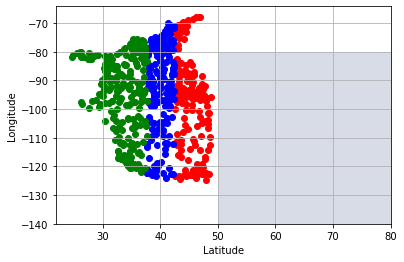

In [49]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import linear_model
import sklearn


df = pd.read_csv("ENGR_518_Solar_energy_datasets.csv")


x=df.iloc[:, 3:5]

df.insert(df.shape[1], 'class', 0)
# print(df)
# df.iat[0, 8]
for i in range(0,925):
    if df.iat[i, 5]<=320:
        df.iat[i, 8]=0
    elif 320<df.iat[i, 5]<=340:
        df.iat[i, 8]=1
    else:
        df.iat[i, 8]=2
# print(df.iloc[:,5:])
y=df.iloc[:,8]
print(y)
df.to_csv('myENGR_518_Solar_energy_datasets.csv')
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, train_size=600, random_state=None)
# print(X_test,y_test)
x1=X_train.iloc[:, 0]#Latitude
x2=X_train.iloc[:, 1]#Longitude
x3=X_test.iloc[:,0]
x4=X_test.iloc[:,1]

# print(x1)
colors=('r','b', 'g')
plt.scatter(x1[y==0],x2[y==0],c=colors[0])
plt.scatter(x1[y==1],x2[y==1],c=colors[1])
plt.scatter(x1[y==2],x2[y==2],c=colors[2]) 
plt.grid(1)
# plt.grid(1)
# plt.legend([iris.target_names[0],iris.target_names[1]])
plt.xlabel('Latitude')
plt.ylabel('Longitude')



# train model1
y1=y_train.copy()
y1[y!=0]=-1
# print(y1)
y1[y==0]=1
# print(y1)
log_regress1 = linear_model.LogisticRegression()
log_regress1.fit(X_train,y1)
x1p=np.linspace(1,5,20)
x2p=-(log_regress1.intercept_+log_regress1.coef_[0][0]*x1p)/log_regress1.coef_[0][1]
# train model2
y2=y_train.copy()
y2[y!=1]=-1
y2[y==1]=1
# print(y2) 
log_regress2 = linear_model.LogisticRegression()
log_regress2.fit(X_train,y2)
# train model3

y3=y_train.copy()
y3[y!=2]=-1
y3[y==2]=1
log_regress3 = linear_model.LogisticRegression()
log_regress3.fit(X_train,y3)
xp1, xp2 = np.meshgrid(np.linspace(50,80,100),np.linspace(-140,-80,100))
# vectorize mesh grid
xp1_v = xp1.reshape(-1,1)
print(xp1_v.shape,xp1.shape)
xp2_v = xp2.reshape(-1,1)
Xp_data = np.append(xp1_v,xp2_v,axis=1)
# calculate model outputs
c1=(log_regress1.intercept_+np.dot(Xp_data,log_regress1.coef_.T))/np.linalg.norm(log_regress1.coef_)
# print(c1)
c2=(log_regress2.intercept_+np.dot(Xp_data,log_regress2.coef_.T))/np.linalg.norm(log_regress2.coef_)
# print(c2)
c3=(log_regress3.intercept_+np.dot(Xp_data,log_regress3.coef_.T))/np.linalg.norm(log_regress3.coef_)
# append and reshape to plot
c=np.hstack((c1,c2,c3))
print(c)
z=np.argmax(c,axis=1)
# print(z)
z=z.reshape(xp1.shape)
print(z)
plt.contourf(xp1,xp2,z,alpha=.2)







In [45]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import linear_model
import sklearn

# csv_reader = csv.reader(open("TMY3_StationsMeta.csv"))
df = pd.read_csv("ENGR_518_Solar_energy_datasets.csv")
# x1=df.iloc[:, 3]#Latitude
# x2=df.iloc[:, 4]#Longitude
x=df.iloc[:, 3:5]
# df.replace("I",0,inplace=True)
# df.replace("II",1,inplace=True)
# df.replace("III",2,inplace=True)
# y=df.iloc[:, 7]
data.insert(data.shape[1], 'd', 0)
print(df.shape)



X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, train_size=600, random_state=None)
# print(X_test,y_test)
x1=X_train.iloc[:, 0]#Latitude
x2=X_train.iloc[:, 1]#Longitude
x3=X_test.iloc[:,0]
x4=X_test.iloc[:,1]

# print(x1)
colors=('r','b', 'g')
plt.scatter(x1[y==0],x2[y==0],c=colors[0])
plt.scatter(x1[y==1],x2[y==1],c=colors[1])
plt.scatter(x1[y==2],x2[y==2],c=colors[2]) 
plt.grid(1)
# plt.grid(1)
# plt.legend([iris.target_names[0],iris.target_names[1]])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.xlim(30, 50)
plt.ylim(-140, -80)



# train model1
y1=y_train.copy()
y1[y!=0]=-1
# print(y1)
y1[y==0]=1
# print(y1)
log_regress1 = linear_model.LogisticRegression()
log_regress1.fit(X_train,y1)
# train model2
y2=y_train.copy()
y2[y!=1]=-1
y2[y==1]=1
# print(y2) 
log_regress2 = linear_model.LogisticRegression()
log_regress2.fit(X_train,y2)
# train model3
y3=y_train.copy()
y3[y!=2]=-1
y3[y==2]=1
log_regress3 = linear_model.LogisticRegression()
log_regress3.fit(X_train,y3)
xp1, xp2 = np.meshgrid(np.linspace(50,80,100),np.linspace(-140,-80,100))
# vectorize mesh grid
xp1_v = xp1.reshape(-1,1)
print(xp1_v.shape,xp1.shape)
xp2_v = xp2.reshape(-1,1)
Xp_data = np.append(xp1_v,xp2_v,axis=1)
# calculate model outputs
c1=(log_regress1.intercept_+np.dot(Xp_data,log_regress1.coef_.T))/np.linalg.norm(log_regress1.coef_)
# print(c1)
c2=(log_regress2.intercept_+np.dot(Xp_data,log_regress2.coef_.T))/np.linalg.norm(log_regress2.coef_)
# print(c2)
c3=(log_regress3.intercept_+np.dot(Xp_data,log_regress3.coef_.T))/np.linalg.norm(log_regress3.coef_)
# append and reshape to plot
c=np.hstack((c1,c2,c3))
print(c)
z=np.argmax(c,axis=1)
# print(z)
z=z.reshape(xp1.shape)
print(z)
plt.contourf(xp1,xp2,z,alpha=.2)


NameError: name 'data' is not defined

(-140.0, -80.0)

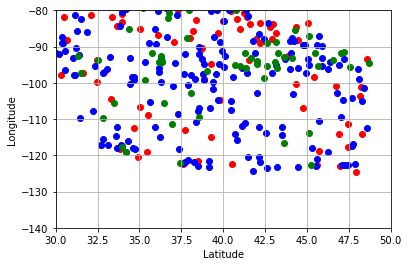

In [8]:
colors=('r','b', 'g')
plt.scatter(x3[y==0],x4[y==0],c=colors[0])
plt.scatter(x3[y==1],x4[y==1],c=colors[1])
plt.scatter(x3[y==2],x4[y==2],c=colors[2]) 
plt.grid(1)
# plt.grid(1)
# plt.legend([iris.target_names[0],iris.target_names[1]])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.xlim(30, 50)
plt.ylim(-140, -80)


(10000, 1) (100, 100)
(10000,)


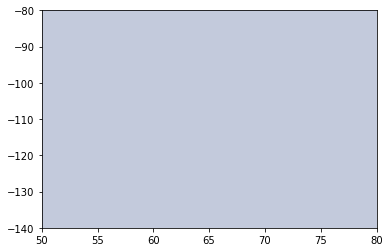

In [9]:
# train model1
y1=y_train.copy()
y1[y!=0]=-1
# print(y1)
y1[y==0]=1
# print(y1)
log_regress1 = linear_model.LogisticRegression()
log_regress1.fit(X_train,y1)
# train model2
y2=y_train.copy()
y2[y!=1]=-1
y2[y==1]=1
# print(y2) 
log_regress2 = linear_model.LogisticRegression()
log_regress2.fit(X_train,y2)
# train model3
y3=y_train.copy()
y3[y!=2]=-1
y3[y==2]=1
log_regress3 = linear_model.LogisticRegression()
log_regress3.fit(X_train,y3)
# xp1, xp2 = np.meshgrid(np.linspace(50,80,100),np.linspace(-140,-80,100))
# vectorize mesh grid
xp1_v = xp1.reshape(-1,1)
print(xp1_v.shape,xp1.shape)
xp2_v = xp2.reshape(-1,1)
Xp_data = np.append(xp1_v,xp2_v,axis=1)
# calculate model outputs
c1=(log_regress1.intercept_+np.dot(Xp_data,log_regress1.coef_.T))/np.linalg.norm(log_regress1.coef_)
# print(c1)
c2=(log_regress2.intercept_+np.dot(Xp_data,log_regress2.coef_.T))/np.linalg.norm(log_regress2.coef_)
# print(c2)
c3=(log_regress3.intercept_+np.dot(Xp_data,log_regress3.coef_.T))/np.linalg.norm(log_regress3.coef_)
# append and reshape to plot
c=np.hstack((c1,c2,c3))
# print(c)
z=np.argmax(c,axis=1)
print(z.shape)
z=z.reshape(xp1.shape)
plt.contourf(xp1,xp2,z,alpha=.3)






[[ 0.96790908  0.54290425 -3.02113607]
 [ 0.9309986   0.54559305 -2.97192412]
 [ 0.89408812  0.54828184 -2.92271217]
 ...
 [-1.24728305 -1.19344628  1.30274974]
 [-1.28419353 -1.19075748  1.35196169]
 [-1.32110401 -1.18806869  1.40117363]]


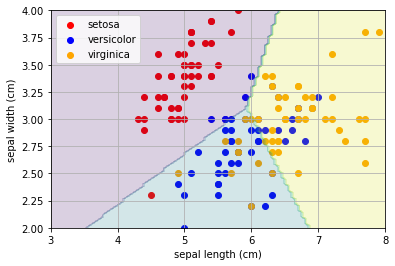

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import linear_model
iris = datasets.load_iris()
# get labels and features, use sepal this time
y = iris.target
x1 = iris.data[:,0]
x2 = iris.data[:,1]
x=np.array([x1,x2])
x=x.T
# scatter plot
plt.scatter(x1[y==0],x2[y==0],c='r')
plt.scatter(x1[y==1],x2[y==1],c='b')
plt.scatter(x1[y==2],x2[y==2],c='orange')
plt.grid(1)
plt.legend(iris.target_names)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.xlim(3, 8)
plt.ylim(2, 4)
# train model1
y1=y.copy()
y1[y==0]=1
y1[y!=0]=-1
log_regress1 = linear_model.LogisticRegression()
log_regress1.fit(x,y1)
# train model2
y2=y.copy()
y2[y==1]=1
y2[y!=1]=-1
log_regress2 = linear_model.LogisticRegression()
log_regress2.fit(x,y2)
# train model3
y3=y.copy()
y3[y==2]=1
y3[y!=2]=-1
log_regress3 = linear_model.LogisticRegression()
log_regress3.fit(x,y3)
xp1, xp2 = np.meshgrid(np.linspace(3,8,100),np.linspace(2,4,100))
# vectorize mesh grid
xp1_v = xp1.reshape(-1,1)
xp2_v = xp2.reshape(-1,1)
Xp_data = np.append(xp1_v,xp2_v,axis=1)
# calculate model outputs
c1=(log_regress1.intercept_+np.dot(Xp_data,log_regress1.coef_.T))/np.linalg.norm(log_regress1.coef_)
c2=(log_regress2.intercept_+np.dot(Xp_data,log_regress2.coef_.T))/np.linalg.norm(log_regress2.coef_)
c3=(log_regress3.intercept_+np.dot(Xp_data,log_regress3.coef_.T))/np.linalg.norm(log_regress3.coef_)
# append and reshape to plot
c=np.hstack((c1,c2,c3))
print(c)
# print(c)
z=np.argmax(c,axis=1)

z=z.reshape(xp1.shape)

plt.contourf(xp1,xp2,z,alpha=.2)